## Prediction using Supervised ML 
### (This is a simple linear regression task as it involves just 2 variables.)
#### Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Data Loading
# Data can be found at http://bit.ly/w-data

data = pd.read_csv('E:/Sparks Foundation/student_scores - student_scores.csv')


data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Representation of dataset in graph to get the visualising idea of the dataset

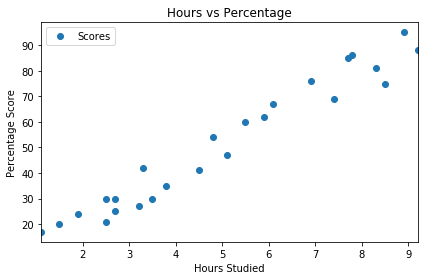

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours',y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()

plt.tight_layout()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring = 'neg_mean_squared_error', cv =20 )
mean_mse = np.mean(mse)
print(mean_mse)

-32.86812146554449


In [6]:
# Train-Test Split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


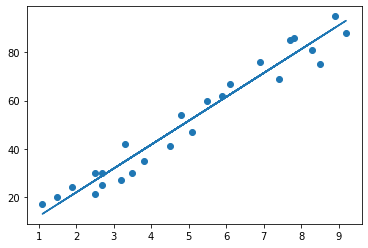

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)

print(own_pred[0])

93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [14]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9454906892105356